# フーリエ解析

フーリエ解析（Fourier analysis）：信号を異なる周波数の正弦波（sin）の重ね合わせとして表現すること

例えば画像を周波数の表現にして、周波数をフーリエ解析で分解したりする。

## フーリエ級数

幅$T$の区間$[-T/2, T/2]$における連続関数$f(t)$はフーリエ級数に展開できる

$$
f(t)=\frac{a_0}{2}+\sum_{k=1}^{\infty}\left(a_k \cos k \omega_o t+b_k \sin k \omega_o t\right), \quad-\frac{T}{2} \leq t \leq \frac{T}{2}
$$

フーリエ係数は

$$
a_k=\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \cos k \omega_o t \mathrm{~d} t, \quad b_k=\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \sin k \omega_o t \mathrm{~d} t
$$

である。
ここで

$$
\omega_o=\frac{2 \pi}{T}
$$

である。これを **基本周波数** といい、フーリエ級数は関数$f(t)$を$\omega_o$の整数倍の周波数の正弦波の重ね合わせとして表現する。

$a_0/2$を **直流成分** と呼び、$\omega_o$の$k$倍の周波数の振動を第$k$ **高調波** と呼ぶ。以下では$t$を「時刻」とみなし、$f(t)$を「信号」と呼ぶ。

:::{margin}

周波数は振動数（ヘルツ Hz：1秒間における振動数）ではない

波の数を数えるとき、1周期を1個とするのではなく、$2\pi$と数える（単位はラジアン）。波を数える角度を **位相（角）** と呼ぶ

:::

## 複素数の指数関数

### 複素数

複素数とは $z=x+i y$ のように **実（数）部** $x$ に **虚（数）部** $y$ の $i$ 倍を足したもの

$i$ は **虚数単位** と呼ばれ、 $i^2=-1$ となる数と約束したもの。

$x$軸を実部 $x=\operatorname{Re} z$、$y$軸を 虚部 $y=\operatorname{Im} z$にとった平面を **複素平面** と呼ぶ


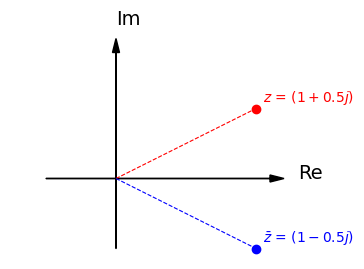

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))

ax.arrow(-0.5, 0, 1.7, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -0.5, 0, 1.5, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "Re", fontsize=14, color='black')
ax.text(0, 1.1, "Im", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])

c = 1 + 0.5j # 複素数
complex_points = [c, c.conjugate()] # conjugate: 共役複素数
colors = ['red', 'blue']

for i, (point, color) in enumerate(zip(complex_points, colors)):
    x, y = point.real, point.imag
    ax.plot([0, x], [0, y], color=color, linestyle='--', linewidth=0.8)
    ax.scatter([x], [y], color=color)
    z = r"$z$" if i == 0 else r"$\bar{z}$"
    ax.text(x + 0.05, y + 0.05, f'{z} = ${point}$', fontsize=10, color=color)


plt.show()

### 共役複素数

複素数 $z=x+i y$ に対して, $\bar{z}=x-i y$ をその **共役（きょうやく）複素数** といい、 $z, \bar{z}$ は **互いに複素共役である** という。
これらは複素平面上で $x$ 軸に関して対称な位置にある。
この定義から

$$
x=\frac{z+\bar{z}}{2}, \quad y=\frac{z-\bar{z}}{2 i}
$$

となる。また重要な関係として

$$
z \bar{z}=(x+i y)(x-i y)=x^2+y^2=|z|^2
$$

が成り立つ。

### オイラーの式

指数部が虚数の指数関数 $e^{i \theta}$ を次の複素数と定義する。

$$
e^{i \theta}=\cos \theta+i \sin \theta
$$

これは **オイラーの式** と呼ばれる式で、複素平面の単位円上の実軸から角度$\theta$の点を表す。

:::{card} 定理

$$
e^{i \theta} e^{i \phi}=e^{i(\theta+\phi)}
$$

が成り立つ。
:::


:::{dropdown} 証明

定義より次のように変形できる

$$
\begin{aligned}
e^{i \theta} e^{i \phi} & =(\cos \theta+i \sin \theta)(\cos \phi+i \sin \phi) \\
& =(\cos \theta \cos \phi-\sin \theta \sin \phi)+i(\cos \theta \sin \phi+\sin \theta \cos \phi)\\
e^{i(\theta+\phi)} &=\cos (\theta+\phi)+i \sin (\theta+\phi)\\
\end{aligned}
$$

両者が等しいことは、三角関数の加法定理

$$
\begin{aligned}
\cos (\theta+\phi) &=\cos \theta \cos \phi-\sin \theta \sin \phi\\
\sin (\theta+\phi) &=\cos \theta \sin \phi+\sin \theta \cos \phi
\end{aligned}
$$

よりわかる
:::


:::{card} 定理

$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}
, \quad
\sin \theta=\frac{e^{i \theta}-e^{-i \theta}}{2 i}
$$

が成り立つ。

:::


:::{dropdown} 証明

オイラーの式 およびその式の $\theta$ を $-\theta$ に置き換えた式

$$
e^{i \theta}=\cos \theta+i \sin \theta
, \quad
e^{-i \theta}=\cos \theta-i \sin \theta
$$

を使うと、

$$
e^{i \theta} + e^{-i \theta}
= \cos \theta + i \sin \theta + \cos \theta-i \sin \theta
= 2 \cos \theta
$$

より

$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}
$$

が得られる。また


$$
e^{i \theta} - e^{-i \theta}
= \cos \theta + i \sin \theta - \cos \theta + i \sin \theta
= 2i \sin \theta
$$

より

$$
\sin \theta=\frac{e^{i \theta}-e^{-i \theta}}{2 i}
$$

が得られる。


:::


## フーリエ級数の複素表示

$$
\cos \theta=\frac{e^{i \theta}+e^{-i \theta}}{2}, \quad \sin \theta=\frac{e^{i \theta}-e^{-i \theta}}{2 i}
$$

を使うと、フーリエ級数は以下のように表すことができる。

$$
\begin{aligned}
f(t) & =\frac{a_0}{2}+\sum_{k=1}^{\infty}\left(a_k \frac{e^{i k \omega_o t}+e^{-i k \omega_o t}}{2}+b_k \frac{e^{i k \omega_o t}-e^{-i k \omega_o t}}{2 i}\right) \\
& =\frac{a_0}{2}+\frac{1}{2} \sum_{k=1}^{\infty}\left(\left(a_k-i b_k\right) e^{i k \omega_o t}+\left(a_k+i b_k\right) e^{-i k \omega_o t}\right)\\
& =\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}
\end{aligned}
$$

ただし

$$
C_k=\left\{\begin{array}{cc}
\left(a_k-i b_k\right) / 2 & k>0 \\
a_0 / 2 & k=0 \\
\left(a_{-k}+i b_{-k}\right) / 2 & k<0
\end{array}\right.
$$

である

また、$C_k$の各式は次のように変形できる

$$
\begin{aligned}
\frac{a_k-i b_k}{2} & =\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \frac{\cos k \omega_o t-i \sin k \omega_o t}{2} \mathrm{~d} t=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t \\
\frac{a_0}{2} & =\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) \mathrm{d} t \\
\frac{a_{-k}+i b_{-k}}{2} & =\frac{2}{T} \int_{-T / 2}^{T / 2} f(t) \frac{\cos \left(-k \omega_o t\right)+i \sin \left(-k \omega_o t\right)}{2} \mathrm{~d} t \\
& =\frac{1}{T} \int_{-T / 2}^{T / 2} f(t)\left(\cos k \omega_o t-i \sin k \omega_o t\right) \mathrm{d} t=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
\end{aligned}
$$


$$
f(t)=\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}, \quad C_k=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
$$

この$C_k$を **（複素）フーリエ係数** と呼ぶ。

:::{info}

$f(t)$は実数なのに、フーリエ係数は複素数なのは問題ないのか？

→ $C_k$と$e^{i k \omega_o t}$は共役複素数なので掛けると虚部が消えて実数になる
:::

:::{info}

位相（波の数）は角度として表される。

特に複素平面上で単位円を考えると、位相は単位円の角度（回転）として表される
:::

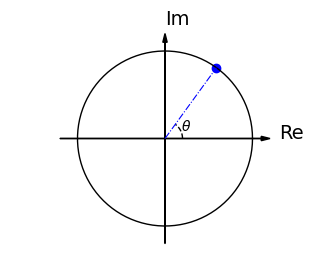

In [3]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 3))

# 軸を描画
ax.arrow(-1.2, 0, 2.4, 0, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)
ax.arrow(0, -1.2, 0, 2.4, head_width=0.05, head_length=0.1, fc='black', ec='black', length_includes_head=True)

ax.text(1.3, 0, "Re", fontsize=14, color='black')
ax.text(0, 1.3, "Im", fontsize=14, color='black')

ax.set_aspect('equal', adjustable='datalim')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(xticks=[], yticks=[])


# 単位円
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, 'k-', linewidth=1)  # 黒い実線で単位円を描画

# curve
t = 0.3*np.pi
theta = np.linspace(0, t, 100)
x = np.cos(theta) * 0.2
y = np.sin(theta) * 0.2
ax.plot(x, y, 'k--', linewidth=1)  # 黒い実線で単位円を描画

# text
m = len(x) // 2
ax.text(x[m], y[m], r"$\theta$")

# line
x = np.cos(t)
y = np.sin(t)
ax.plot([0, x], [0, y], color="blue", linestyle='-.', linewidth=0.8)
ax.scatter([x], [y], color="blue")

plt.show()

## フーリエ変換

フーリエ級数

$$
f(t)=\sum_{k=-\infty}^{\infty} C_k e^{i k \omega_o t}, \quad C_k=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_o t} \mathrm{~d} t
$$

において

$$
\omega_k=k \omega_o, \quad k=0, \pm 1, \pm 2, \ldots
$$

とおき、

$$
\Delta \omega=\omega_{k+1}-\omega_k=\omega_o=\frac{2 \pi}{T}, \quad C_k=\frac{F\left(\omega_k\right)}{T}
$$

と書くと、

$$
f(t)=\frac{1}{2 \pi} \sum_{k=-\infty}^{\infty} F\left(\omega_k\right) e^{i \omega_k t} \Delta \omega, \quad F\left(\omega_k\right)=\int_{-T / 2}^{T / 2} f(t) e^{-i \omega_k t} \mathrm{~d} t
$$

となる。周期$T\to\infty$とすると、$\Delta \omega \to 0$となり、積分として表すことができる。

$$
F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t
$$

を信号$f(t)$の **フーリエ変換** と呼び、

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \mathrm{~d} \omega
$$

を **逆フーリエ変換** と呼ぶ。

:::{note}

- 信号$f(t)$（逆フーリエ変換）は周波数$\omega$の正弦波$e^{i \omega t}$を負の数を含めたすべての実数$\omega$に対して重ね合わせている
- フーリエ変換 $F(\omega)$ は信号$f(t)$に$e^{i \omega t}$の共役複素数$e^{-i \omega t}$を掛けて、すべての時刻$t$で積分した形になっている
:::

:::{admonition} フーリエ変換

$$
F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t
$$

:::

:::{admonition} 逆フーリエ変換

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} \mathrm{~d} \omega
$$

逆フーリエ変換は信号$f(t)$をあらゆる周波数（すべての実数の$\omega$）の振動の重ね合わせで表す。

$F(\omega)$は周波数$\omega$の成分$e^{i \omega t}$の大きさを表し、$f(t)$の **スペクトル** （フランス語: spectre、英語: spectrum）と呼ばれる。（光をプリズムに通して各色のスペクトルに分けるイメージ）

$|\omega|$が大きい成分は **高周波成分** 、小さい成分は **低周波成分** と呼ばれる。とくに$\omega=0$の成分は定数であり、 **直流成分** と呼ばれる。

:::

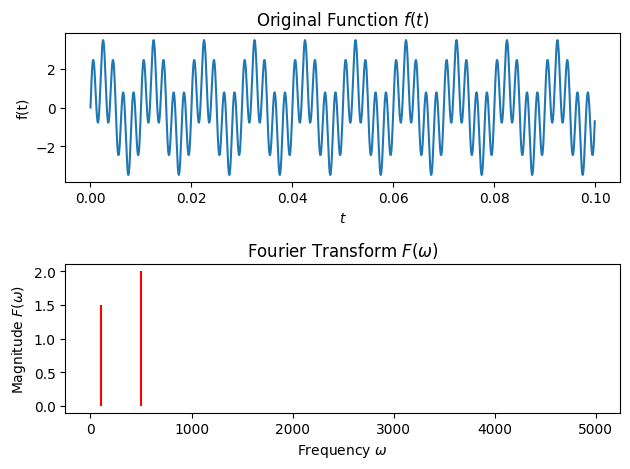

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータを生成する
N = 1000
d = 0.0001 # サンプリング周期
t = np.arange(0, N * d, d) # 時間

def f(t):
    freq1, freq2 = 100, 500  # 周波数
    s1, s2 = 1.5, 2 # スペクトル F(ω)
    return s1 * np.sin(2 * np.pi * t * freq1) + s2 * np.sin(2 * np.pi * t * freq2)

y = f(t)
F = np.fft.fft(y) # フーリエ変換
freq = np.fft.fftfreq(N, d=d)  # 周波数スケール

# 振幅スペクトル Amplitude の取得
# 振幅スペクトルは信号をフーリエ変換した結果の絶対値をとったもの
Amp = np.abs(F)
Amp = Amp / (N / 2) # 正規化

# 結果をプロット
fig, axes = plt.subplots(nrows=2)
axes[0].plot(t, y)
axes[0].set(title=r'Original Function $f(t)$', xlabel=r"$t$", ylabel=r"f(t)")

# 左右対称なので正の値だけ N//2 で取り出す
axes[1].stem(freq[:N//2], Amp[:N//2], 'r', markerfmt=" ", basefmt=" ")
axes[1].set(title=f'Fourier Transform $F(\omega)$', xlabel=r'Frequency $ω$', ylabel=r'Magnitude $F(ω)$')

fig.tight_layout()
fig.show()

### 例：矩形窓

:::{card}

次の関数は幅$W$の **矩形窓（rectangular window）** と呼ばれる

$$
w(t)=\left\{\begin{array}{cc}
1 / 2 W & -W \leq t \leq W \\
0 & \text { それ以外 }
\end{array}\right.
$$

このフーリエ変換は

$$
\begin{aligned}
W(\omega)
&=\frac{1}{2 W} \int_{-W}^W e^{-i \omega t} \mathrm{~d} t \\
&=\frac{1}{2 W} \int_{-W}^W(\cos \omega t-i \sin \omega t) \mathrm{d} t \quad (オイラーの式より e^{-i \omega t} = \cos \omega t-i \sin \omega t)\\
&=\frac{1}{2 W} \left( \int_{-W}^W \cos \omega t ~\mathrm{d} t  - \int_{-W}^W i \sin \omega t ~\mathrm{d} t \right)
\quad (\because 積分の線形性)
\\
&=\frac{1}{2W} \int_{-W}^W \cos \omega t ~ \mathrm{d} t
\quad (\because \sinは奇関数すなわち \sin(-\theta) = -\sin(\theta) であり、-Wから+Wまで積分したら0になるため消える )
\\
&=\frac{1}{W} \int_0^W \cos \omega t \mathrm{~d} t
\quad (\because \int_{-W}^W \cos \omega t ~ \mathrm{d} t = 2 \int_{0}^W \cos \omega t ~ \mathrm{d} t )
\\
&=\frac{1}{W}\left[ \frac{\sin \omega t}{\omega} \right]_0^W
\quad (\because \int \cos (\omega t) d t=\frac{\sin (\omega t)}{\omega} )
\\
&=\frac{1}{W} \left( \frac{\sin \omega W}{\omega} - \frac{\sin 0}{\omega} \right)
\\
&=\frac{\sin W \omega}{W \omega}
\quad (\because \sin 0 = 0)
\\
&=\operatorname{sinc} \frac{W}{\pi} \omega
\end{aligned}
$$

となる。ただし、

$$
\operatorname{sinc} x :=\frac{\sin \pi x}{\pi x}
$$

と定義する。
:::

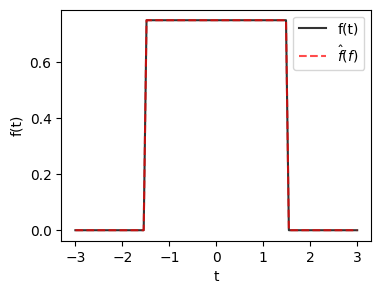

In [39]:
# 参考：numpyの高速フーリエ変換 fft を使う場合
# 自分で離散的なデータポイントからフーリエ変換するのは離散フーリエ変換を学んでからやる
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))

# もとの関数 f(t)
w = 1.5  # width
def f(t):
    return (1/2*w) * 1 * ((-w <= t) & (t <= w))

t = np.linspace(-3, 3, 100)
y = f(t)
ax.plot(t, f(t), label="f(t)", color="black", alpha=0.8)

# フーリエ変換 F(omega)
fourier = np.fft.fft(y)
inv_fourier = np.fft.ifft(fourier).real  # 実部のみ
ax.plot(t, inv_fourier, label=r"$\hat{f}(f)$", color="red", linestyle="--", alpha=0.7)

ax.set(xlabel="t", ylabel="f(t)")
ax.legend()
plt.show()

:::{card}

次の関数$w(t)$ を幅$\sigma$の **ガウス窓（Gaussian window）** という。

$$
w(t)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-t^2 / 2 \sigma^2}
$$

このフーリエ変換は

$$
\begin{aligned}
W(\omega)
&= \int_{-\infty}^{\infty} w(t) e^{-i \omega t} \mathrm{~d} t \\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-t^2 / 2 \sigma^2} e^{-i \omega t} \mathrm{~d} t \\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty}
e^{-( \frac{t^2}{2 \sigma^2} + i \omega t)} \mathrm{~d} t
\quad ( 指数法則 a^{n}a^m=a^{n+m})\\
&= \frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-\left(t+i \sigma^2 \omega\right)^2 / 2 \sigma^2-\sigma^2 \omega^2 / 2} \mathrm{~d} t
\quad (平方完成したり色々いじるとこうなる)
\\
&= \left(\frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-\left(t+i \sigma^2 \omega\right)^2 / 2 \sigma^2} \mathrm{~d} t\right) e^{-\sigma^2 \omega^2 / 2}
\end{aligned}
$$

ここで $z=t+i \sigma^2 \omega$と変数変換すると

$$
\begin{aligned}
W(\omega)
& =\left(\frac{1}{\sqrt{2 \pi} \sigma} \int_{-\infty}^{\infty} e^{-z^2 / 2 \sigma^2} \mathrm{~d} z\right) e^{-\sigma^2 \omega^2 / 2} \\
& =e^{-\sigma^2 \omega^2 / 2}\\
&=\frac{\sqrt{2 \pi}}{\sigma}\left(\frac{1}{\sqrt{2 \pi} \sigma^{-1}} e^{-\omega^2 / 2 \sigma^{-2}}\right)
\end{aligned}
$$

となる

:::

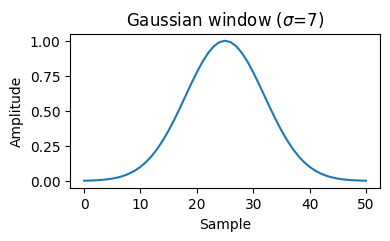

In [159]:
from scipy import signal
import matplotlib.pyplot as plt
window = signal.windows.gaussian(51, std=7)
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(window)
ax.set(title=r"Gaussian window ($\sigma$=7)", ylabel="Amplitude", xlabel="Sample")
fig.show()

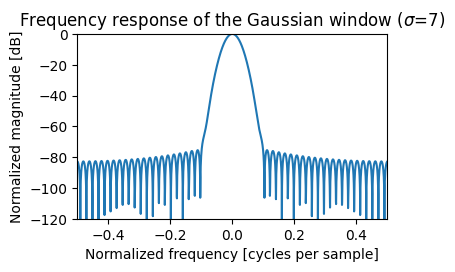

In [163]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 2.4))

window = signal.windows.gaussian(51, std=7)
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
ax.plot(freq, response)
ax.plot(window)
ax.set(title=r"Frequency response of the Gaussian window ($\sigma$=7)",
       ylabel="Normalized magnitude [dB]", xlabel="Normalized frequency [cycles per sample]",
       xlim=(-0.5, 0.5), ylim=(-120, 0))
fig.show()

（出典：[gaussian — SciPy v1.14.1 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) ）

## 畳み込み積分

:::{admonition} たたみこみ積分

次の積分を信号 $f(t), g(t)$ の **たたみこみ積分** （convolution） または **合成積** と呼ぶ

$$
f(t) * g(t)=\int_{-\infty}^{\infty} f(s) g(t-s) \mathrm{d} s
$$

:::
（左辺の積分における$f$と$g$の変数の和が$s + t-s = t$となっている）

畳み込み積分は分配法則、交換法則、結合法則が成り立つ

- 分配法則： $f(t) *(a g(t)+b h(t))=a f(t) * g(t)+b f(t) * h(t)$
- 交換法則：$f(t) * g(t)=g(t) * f(t)$
- 結合法則：$(f(t) * g(t)) * h(t)=f(t) *(g(t) * h(t))$

:::{admonition} 定理（信号の合成積はフーリエ変換の積）

信号 $f(t), g(t)$ のフーリエ変換をそれぞれ $F(\omega), G(\omega)$ とするとき、 $f(t) * g(t)$ のフーリエ変換は $F(\omega) G(\omega)$ である
:::

:::{dropdown} 証明

$f(t) * g(t)$のフーリエ変換は次のようになる

$$
\begin{aligned}
\int_{-\infty}^{\infty} f(t) * g(t) e^{-i \omega t} \mathrm{~d} t & =\int_{-\infty}^{\infty}\left(\int_{-\infty}^{\infty} f(s) g(t-s) \mathrm{d} s\right) e^{-i \omega t} \mathrm{~d} t \\
& =\int_{-\infty}^{\infty} f(s)\left(\int_{-\infty}^{\infty} g(t-s) e^{-i \omega t} \mathrm{~d} t\right) \mathrm{d} s \\
& =\int_{-\infty}^{\infty} f(s)\left(\int_{-\infty}^{\infty} g\left(t^{\prime}\right) e^{-i \omega\left(t^{\prime}+s\right)} \mathrm{d} t^{\prime}\right) \mathrm{d} s \\
& =\int_{-\infty}^{\infty} f(s)\left(\int_{-\infty}^{\infty} g\left(t^{\prime}\right) e^{-i \omega t^{\prime}} \mathrm{d} t^{\prime}\right) e^{-i \omega s} \mathrm{~d} s \\
& =\left(\int_{-\infty}^{\infty} f(s) e^{-i \omega s} \mathrm{~d} s\right)\left(\int_{-\infty}^{\infty} g\left(t^{\prime}\right) e^{-i \omega t^{\prime}} \mathrm{d} t^{\prime}\right) \\
& =F(\omega) G(\omega)
\end{aligned}
$$

（積分の順序を入れ換え、 $t^{\prime}=t-s$ と変数変換し、 $t=t^{\prime}+s$ を代入した）
:::

一般に、ある集合に要素間の演算が定義されているものを **代数系** と呼ぶ。そして2つの異なる集合での演算が同じ規則に従うとき、2つの代数系は **同型** であるという。
関数の和$+$と畳み込み積分$*$に関する演算は、そのフーリエ変換の和$+$と積$\times$に関する演算と同じであり、両方の代数系が同型である。

## フィルター

信号 $f(t)$ の値を時刻 $t$ をはさむ幅 $2 W$ の区間で平均し、これを $\tilde{f}(t)$ と定義する。

$$
\tilde{f}(t) := \frac{1}{2 W} \int_{-W}^W f(t-s) \mathrm{d} s
$$

矩形窓やガウス窓$w(t)$を使うと、次のように書き直すことができる

$$
\tilde{f}(t)=\int_{-\infty}^{\infty} w(s) f(t-s) \mathrm{d} s=w(t) * f(t)
$$

これにより、関数$w(t)$を様々な関数に変えれば信号$f(t)$の様々な変換ができる。このような操作を関数$w(t)$による **フィルター** という。

$w(t), f(t)$のフーリエ変換をそれぞれ$W(\omega), F(\omega)$とおけば、畳み込み積分の定理により$\tilde{f}(t) = w(t)*f(t)$のフーリエ変換は

$$
\tilde{F}(\omega) = W(\omega) F(\omega)
$$

と書くことができる。

もし$|\omega|$が小さい部分で$|W(\omega)|$が大きく、$|\omega|$が大きい部分で$|W(\omega)|$が小さくなる場合、$w(t)$によるフィルターは低周波成分を増幅し、高周波成分を減衰させる。このようなフィルターを **ローパスフィルター** （ **低域フィルター** ）と呼ぶ。その逆のフィルターを **ハイパスフィルター** （ **高域フィルター** ）と呼ぶ。

その中間として、特定の$|\omega|$の付近を増幅し、それ以外を減衰させるフィルターは **帯域フィルター** （ **バンドパスフィルター** ）と呼ぶ。

:::{card} 例

[fftconvolve — SciPy v1.14.1 Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html#scipy.signal.fftconvolve)

ガウシアンブラーで画像を平滑化（ぼかす）例がある
:::

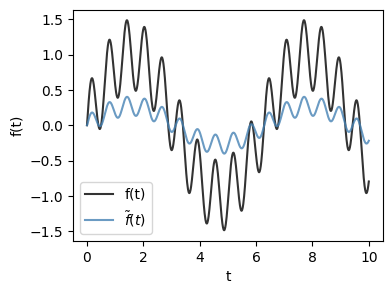

In [197]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
t = np.linspace(0, 10, N)

def f(t):
    return np.sin(t) + 0.5 * np.sin(10 * t)

signal = f(t)

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(t, signal, label="f(t)", color="black", alpha=0.8)
ax.set(xlabel="t", ylabel="f(t)")

from scipy.signal.windows import gaussian
from scipy.signal import fftconvolve

def gaussian_smoothing(signal, window_size, std_dev):
    # ガウス窓を作成
    gauss_window = gaussian(window_size, std=std_dev)
    # gauss_window /= gauss_window.sum()  # 窓の正規化
    # 畳み込み
    return fftconvolve(signal, gauss_window, mode='same')  # 同じ長さを保つ

smoothed_signal = gaussian_smoothing(signal, window_size=N//2, std_dev=0.25)
ax.plot(t, smoothed_signal, label=r"$\tilde{f}(t)$", color="steelblue", alpha=0.8)
ax.legend()
fig.show()

:::{admonition} 小まとめ

信号$f(t)$をフーリエ変換

$$
F(\omega)=\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t
$$

して、個々の$\omega$に対応するスペクトル（周波数$\omega$の影響度の強さ）$F(\omega)$を得ることができ、またそれにより$f(t)$に含まれる周波数ごとの正弦波$e^{i\omega t}$も分解できる。


そして窓関数$w(t)$による畳み込み

$$
\tilde{f}(t) = w(t) * f(t) = \int_{-\infty}^{\infty} w(s) f(t-s) \mathrm{d} s
$$

をすることで、特定の周波数をカットするなどの変換を行って信号を変換することができる。

一つの身近な具体例は画像に対するガウシアンフィルタ（ガウシアン平滑化・ガウシアンブラー）によるぼかし

:::

## パワースペクトル



:::{admonition} パーセバル（・プランシュレル）の式

信号 $f(t), g(t)$ のフーリエ変換をそれぞれ $F(\omega), G(\omega)$ とする。

このとき、以下の **パーセバル（・プランシュレル）の式** が成り立つ

$$
\int_{-\infty}^{\infty} f(t) \overline{g(t)} ~\mathrm{d} t
=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) \overline{G(\omega)} ~\mathrm{d} \omega
\\
\int_{-\infty}^{\infty}|f(t)|^2 \mathrm{~d} t
=\frac{1}{2 \pi} \int_{-\infty}^{\infty}|F(\omega)|^2 \mathrm{~d} \omega
$$

:::

:::{dropdown} 証明

$$
\int_{-\infty}^{\infty} f(t) \overline{g(t)} ~\mathrm{d} t
=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) \overline{G(\omega)} ~\mathrm{d} \omega
$$

については、

$$
\begin{aligned}
\int_{-\infty}^{\infty} f(t) \overline{g(t)} \mathrm{d} t
& =\int_{-\infty}^{\infty} f(t)\left(\frac{1}{2 \pi} \int_{-\infty}^{\infty} \overline{G(\omega)} e^{-i \omega t} \mathrm{~d} \omega\right) \mathrm{d} t \\
& =\frac{1}{2 \pi} \int_{-\infty}^{\infty}\left(\int_{-\infty}^{\infty} f(t) e^{-i \omega t} \mathrm{~d} t\right) \overline{G(\omega)} \mathrm{d} \omega \\
& =\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) \overline{G(\omega)} \mathrm{d} \omega
\end{aligned}
$$

$g(t) = f(t)$とすると

$$
\int_{-\infty}^{\infty}|f(t)|^2 \mathrm{~d} t
=\frac{1}{2 \pi} \int_{-\infty}^{\infty}|F(\omega)|^2 \mathrm{~d} \omega
$$

が得られる
:::

信号$f(t)$が時間$t$とともに変動する振動を表すとき、$|f(t)|^2$はその振動の単位時間あたりの **エネルギー** とみなすことができる。

パーセバルの第2式

$$
\int_{-\infty}^{\infty}|f(t)|^2 \mathrm{~d} t
=\frac{1}{2 \pi} \int_{-\infty}^{\infty} |F(\omega)|^2 \mathrm{~d} \omega
$$

はエネルギーがすべての$\omega$にわたる$|F(\omega)|^2$の積分で表されることを意味する。

これを **パワースペクトル** と呼び、

$$
P(\omega) = |F(\omega)|^2
$$

は周波数$\omega$の振動成分のもつエネルギーであると解釈できる。

:::{margin}

物理学では振動のエネルギーが$\frac{1}{2}(\text{ 定数 }) \times(\text { 振幅 })^2$で表されるため、振幅の2乗をエネルギーと呼ぶ考え方になったらしい

:::

フーリエ変換$F(\omega)$は一般に複素数だが、その絶対値は実数になりグラフに描くことができる。

フーリエ変換は共役$F(-\omega) = \overline{F(\omega)}$であり$|F(-\omega)| = |\overline{F(\omega)}|$だから、パワースペクトルはグラフにすると原点を中心に左右対称になる。

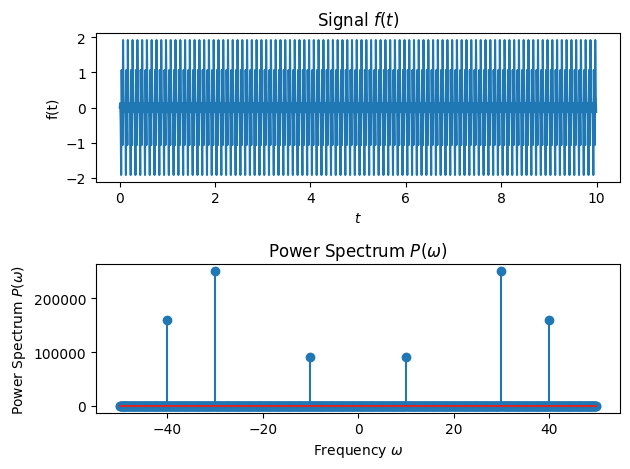

In [243]:
# 画像にしたがうまくいかなかった
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
duration = 10
N = int(sampling_rate * duration)

t = np.linspace(0, duration, N, endpoint=False)
frequencies = [30, 60, 90, 150, 300]
amplitudes = [1.0, 0.8, 0.6, 0.4, 0.2]
signal = sum(
    amp * np.sin(2 * np.pi * freq * t) for freq, amp in zip(frequencies, amplitudes)
)

# Perform the Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1 / sampling_rate)
power_spectrum = np.abs(fft_result)**2

# 結果をプロット
fig, axes = plt.subplots(nrows=2)
axes[0].plot(t, signal)
axes[0].set(title=r'Signal $f(t)$', xlabel=r"$t$", ylabel=r"f(t)")
axes[1].stem(frequencies[:len(frequencies)], power_spectrum[:len(frequencies)])
# axes[1].stem(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2])
axes[1].set(title=f'Power Spectrum $P(\omega)$', xlabel=r'Frequency $ω$', ylabel=r'Power Spectrum $P(ω)$')
fig.tight_layout()
fig.show()

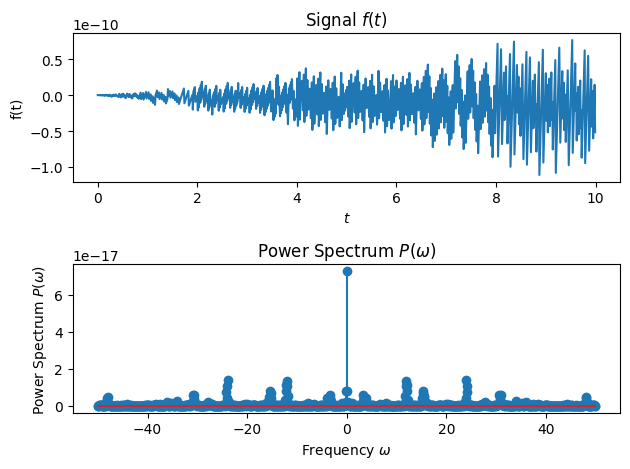

In [245]:
# 画像にしたがうまくいかなかった

import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
duration = 10
N = int(sampling_rate * duration)

# Time
t = np.linspace(0, duration, N, endpoint=False)

# frequencies
signal = np.zeros_like(t)
w = np.arange(-100, 100, 10)
for frequency in w:
    amp = abs(frequency) / 1
    signal += amp * np.sin(2 * np.pi * frequency * t)

# Perform the Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(N, 1 / sampling_rate)

# Compute the power spectrum (magnitude squared of FFT)
power_spectrum = np.abs(fft_result)**2
# power_spectrum = power_spectrum / (N / 2) # 正規化

# 結果をプロット
fig, axes = plt.subplots(nrows=2)
axes[0].plot(t, signal)
axes[0].set(title=r'Signal $f(t)$', xlabel=r"$t$", ylabel=r"f(t)")
axes[1].stem(frequencies[:len(frequencies)], power_spectrum[:len(frequencies)])
axes[1].set(title=f'Power Spectrum $P(\omega)$', xlabel=r'Frequency $ω$', ylabel=r'Power Spectrum $P(ω)$')
fig.tight_layout()
fig.show()

### 複素計量空間（ユニタリ空間）とのつながり

信号$f,g$の内積を

$$
(f, g) := \int_{-\infty}^{\infty} f(t) \overline{g(t)} ~\mathrm{d} t
$$

と定義すれば、ノルムも

$$
\|f\| = \sqrt{(f,f)}
$$

と定義でき、フーリエ変換も

$$
(F, G):=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\omega) \overline{G(\omega)} \mathrm{d} \omega
$$

とおけば

$$
\|F\|=\sqrt{\frac{1}{2 \pi} \int_{-\infty}^{\infty}|F(\omega)|^2 \mathrm{~d} \omega}
$$

となり、パーセバルの式は

$$
(f, g)=(F, G), \quad\|f\|^2=\|F\|^2
$$

とシンプルでエレガントな表記にすることができる。

この内積は計量ベクトル空間の内積の公理のうち対称性$(f,g) = (g,f)$を満たさないが、ユニタリ空間におけるエルミート対称性$(f,g) = \overline{(g,f)}$は満たす。つまり、ユニタリ空間上で考えるなら上のシンプルな表記が可能。

:::{admonition} （エルミート）内積

スカラとして複素数を取る線形空間$\mathcal{L}$を **複素線形空間** といい、任意の元$\boldsymbol{u},\boldsymbol{v} \in \mathcal{L}$について次の性質を満たす複素数$(\boldsymbol{u},\boldsymbol{v})$が定義されるとき、それを **（エルミート）内積** という。

1. 任意の $\boldsymbol{u} \in \mathcal{L}$ に対して $(\boldsymbol{u}, \boldsymbol{u}) \geq 0$. 等号が成り立つのは $\boldsymbol{u}=\mathbf{0}$ のときのみ （ **正値性** ）
2. 任意の $\boldsymbol{u}, \boldsymbol{v} \in \mathcal{L}$ に対して $(\boldsymbol{u}, \boldsymbol{v})=\overline{(\boldsymbol{v}, \boldsymbol{u})}$ （ **エルミート対称性** ）
3. 任意の複素数 $c_1, c_2$ と任意の $\boldsymbol{u}, \boldsymbol{v}_1, \boldsymbol{v}_2 \in \mathcal{L}$ に対して $\left(c_1 \boldsymbol{u}_1+c_2 \boldsymbol{u}_2, \boldsymbol{v}\right)=c_1\left(\boldsymbol{u}_1, \boldsymbol{v}\right)+$ $c_2\left(u_2, \boldsymbol{v}\right)$ （ **線形性** ）

:::


:::{admonition} （ユニタリ）ノルム

$\mathcal{L}$ を複素線形空間とする。 $\boldsymbol{u} \in \mathcal{L}$ の **（ユニタリ）ノルム** を次のように定義する

$$
\|\boldsymbol{u}\| = \sqrt{(\boldsymbol{u},\boldsymbol{u})}
$$

:::

:::{admonition} ユニタリ空間（複素計量空間）

上記のような内積とノルムが定義されている複素線形空間$\mathcal{L}$を **ユニタリ空間** または **複素計量空間** という。

:::


## 自己相関関数

:::{admonition} 自己相関関数

次の関数 $R(\tau)$ を信号 $f(t)$ の **自己相関関数** と呼ぶ。

$$
R(\tau)=\int_{-\infty}^{\infty} f(t) \overline{f(t-\tau)} ~\mathrm{d} t
$$

:::

$R(0)$ は信号 $f(t)$ のエネルギー $\int_{-\infty}^{\infty}|f(t)|^2 \mathrm{~d} t$ に等しく、通常は大きな値をとる。
$|\tau|$ が大きくなると $R(\tau)$ は急速に減衰する。

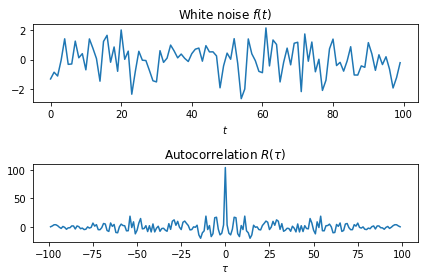

In [265]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
sig = rng.standard_normal(100)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(2, 1, dpi=72, figsize=[6, 4])
ax_orig.plot(sig)
ax_orig.set(title=f'White noise $f(t)$', xlabel=r"$t$")
ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set(title=r'Autocorrelation $R(\tau)$', xlabel=r"$\tau$")
fig.tight_layout()
fig.show()

:::{card} なぜ自己相関関数と呼ぶのか

実数の信号 $f(t), g(t)$ の内積 $\int_{-\infty}^{\infty} f(t) g(t) \mathrm{d} t$ の場合、$f(t)$と$g(t)$が無関係なら$f(t)g(t)$はそれぞれプラスとマイナスで打ち消し合ったりして小さい値になるが、$f(t)$と$g(t)$が似てるなら$f(t)g(t)\approx f(t)^2 \geq 0$となり、積分すると大きな値になる。

複素数の信号の場合はエルミート内積$\int_{-\infty}^{\infty} f(t) \overline{g(t)} \mathrm{d} t$を考えると、もし$f(t)$と$g(t)$が似てるなら$f(t)g(t) \approx f(t)\overline{f(t)} \approx |f(t)|^2 \geq 0$となり、積分すると大きな値になる。

このように、内積・エルミート内積は類似度の尺度となり、 **（相互）相関** と呼ばれる。

$f(t)$ と、それを$\tau$だけ平行移動した $f(t-\tau)$ の類似度なので自己相関と呼ばれる。
:::

:::{card} 自己相関関数の性質

$$
R(-\tau)=\overline{R(\tau)}
, \quad|R(-\tau)|=|R(\tau)|
$$
:::

:::{dropdown} 証明

第1式は

$$
\begin{aligned}
R(-\tau) &=\int_{-\infty}^{\infty} f(t) \overline{f(t+\tau)} \mathrm{d} t\\
&=\int_{-\infty}^{\infty} f\left(t^{\prime}-\tau\right) \overline{f\left(t^{\prime}\right)} \mathrm{d} t^{\prime} \\
&=\overline{\int_{-\infty}^{\infty} f\left(t^{\prime}\right) \overline{f\left(t^{\prime}-\tau\right)} \mathrm{d} t^{\prime}}=\overline{R(\tau)}
\end{aligned}
$$

で示される。また共役複素数をとっても絶対値は変化しないため第2式が成り立つ。
:::

:::{admonition} ウィーナー・ヒンチンの定理

自己相関関数のフーリエ変換はパワースペクトルに等しい。

$$
P(\omega)=\int_{-\infty}^{\infty} R(\tau) e^{-i \omega \tau} \mathrm{~d} \tau
$$
:::

よってパワースペクトルを算出するには、2通りの方法がある

1. 信号$f(t)$のフーリエ変換$F(\omega)$を計算して絶対値の2乗を取る
2. 自己相関関数$R(\tau)$を計算してフーリエ変換する

信号を精度よく積分するのは難しいため、自己相関関数で算出するほうが実用上は便利らしい


## 参考

- 金谷健一. (2003). これなら分かる応用数学教室: 最小二乗法からウェーブレットまで.
- [小野弓絵. (2019). いまさら聞けない信号処理. 生体医工学, 57(2-3), 75-80.](https://www.jstage.jst.go.jp/article/jsmbe/57/2-3/57_75/_pdf/-char/ja)